# The Link Of The Data Set And The Competition On Kaggle
https://www.kaggle.com/datasets/mahmoudreda55/arabic-letters-numbers-ocr

# Import the libraries

In [ ]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image_dataset_from_directory ,image
import keras
from PIL import Image
import pandas as pd
import seaborn
import os
from tensorflow.keras.layers import Dropout
import pickle
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import layers, models
import shutil

2024-02-27 19:47:45.946351: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-27 19:47:45.946453: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-27 19:47:46.137973: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# Prepare the data

## Data augmentation

In [ ]:
data_datagen = ImageDataGenerator(
    rescale=1. / 255,rotation_range=10, fill_mode='nearest',
     featurewise_center=True,
    featurewise_std_normalization=True,
    vertical_flip= True,
    shear_range=0.2,
    zoom_range=0.2,
    brightness_range = (0.4,0.6),
    horizontal_flip=True,validation_split=0.3)

In [ ]:
#show the class inside the sets
data_dir = ('../input/arabic-letters-numbers-ocr/Dataset')
classes_data =os.listdir(data_dir)
classes_data

['س',
 'و',
 'ظ',
 'ط',
 'غ',
 'ف',
 'ا',
 '٣',
 'ض',
 'ث',
 'ذ',
 '٩',
 'ق',
 '١',
 'ش',
 '٤',
 'ص',
 'ب',
 '٥',
 'ت',
 'لا',
 '٠',
 'ي',
 'ج',
 'ح',
 'خ',
 '٧',
 'ز',
 '٨',
 'ه',
 'د',
 '٢',
 'ك',
 'م',
 'ر',
 'ل',
 'ن',
 '٦',
 'ع']

## Creat a new dataset for letters only

In [ ]:
# Path to the read-only directory containing class folders
readonly_dataset_dir = "../input/arabic-letters-numbers-ocr/Dataset"

# Path to the new directory where you want to copy the classes
new_dataset_dir = "new_dataset"

# List of classes to delete
classes_to_delete = ['٣', '٩', '١', '٤', '٥', '٠', '٧', '٨',  '٢', '٦']

# Create the new directory if it doesn't exist
if not os.path.exists(new_dataset_dir):
    os.makedirs(new_dataset_dir)

# Iterate through each class folder in the read-only directory
for class_name in os.listdir(readonly_dataset_dir):
    class_path = os.path.join(readonly_dataset_dir, class_name)

    # Check if it is a directory
    if os.path.isdir(class_path):
        # Check if the class should be kept
        if class_name not in classes_to_delete:
            # Check if the class folder already exists in the new directory
            new_class_path = os.path.join(new_dataset_dir, class_name)
            if not os.path.exists(new_class_path):
                # Copy the class folder and its contents to the new directory
                shutil.copytree(class_path, new_class_path)
                print(f"Copied class '{class_name}'.")
            else:
                print(f"Class '{class_name}' already exists in the new dataset. Skipping...")
    else:
        print(f"'{class_path}' is not a directory.")



Copied class 'س'.
Copied class 'و'.
Copied class 'ظ'.
Copied class 'ط'.
Copied class 'غ'.
Copied class 'ف'.
Copied class 'ا'.
Copied class 'ض'.
Copied class 'ث'.
Copied class 'ذ'.
Copied class 'ق'.
Copied class 'ش'.
Copied class 'ص'.
Copied class 'ب'.
Copied class 'ت'.
Copied class 'لا'.
Copied class 'ي'.
Copied class 'ج'.
Copied class 'ح'.
Copied class 'خ'.
Copied class 'ز'.
Copied class 'ه'.
Copied class 'د'.
Copied class 'ك'.
Copied class 'م'.
Copied class 'ر'.
Copied class 'ل'.
Copied class 'ن'.
Copied class 'ع'.


In [ ]:
# Assuming you have a directory containing subdirectories for each class
dataset_dir = '/kaggle/working/new_dataset'  # Replace 'path/to/dataset' with the actual path to your dataset directory

# Get the list of class labels (directory names)
class_labels = sorted(os.listdir(dataset_dir))

# Print all class labels
for idx, label in enumerate(class_labels):
    print(f"Class {idx}: {label}")


Class 0: ا
Class 1: ب
Class 2: ت
Class 3: ث
Class 4: ج
Class 5: ح
Class 6: خ
Class 7: د
Class 8: ذ
Class 9: ر
Class 10: ز
Class 11: س
Class 12: ش
Class 13: ص
Class 14: ض
Class 15: ط
Class 16: ظ
Class 17: ع
Class 18: غ
Class 19: ف
Class 20: ق
Class 21: ك
Class 22: ل
Class 23: لا
Class 24: م
Class 25: ن
Class 26: ه
Class 27: و
Class 28: ي


## Ensure from the classes in the new dataset

In [ ]:
# Path to the new dataset directory
new_dataset_dir = "new_dataset"

# Initialize a counter for the classes
class_count = 0

# Iterate through each item in the new dataset directory
for item in os.listdir(new_dataset_dir):
    item_path = os.path.join(new_dataset_dir, item)

    # Check if the item is a directory
    if os.path.isdir(item_path):
        class_count += 1

# Print the total number of classes
print(f"Total number of classes in the new dataset: {class_count}")


Total number of classes in the new dataset: 29


## Seprate the data to train and validation

In [ ]:
train_generator = data_datagen.flow_from_directory(
    'new_dataset',
    target_size=(32, 32),
    batch_size=32,subset='training',
    class_mode='sparse'
  )


Found 50373 images belonging to 29 classes.


In [ ]:
val_generator = data_datagen.flow_from_directory(
     'new_dataset',
    target_size=(32, 32),
    batch_size=32,subset='validation',
    class_mode='sparse'
  )

Found 21576 images belonging to 29 classes.


## show the data

Found 71949 files belonging to 29 classes.


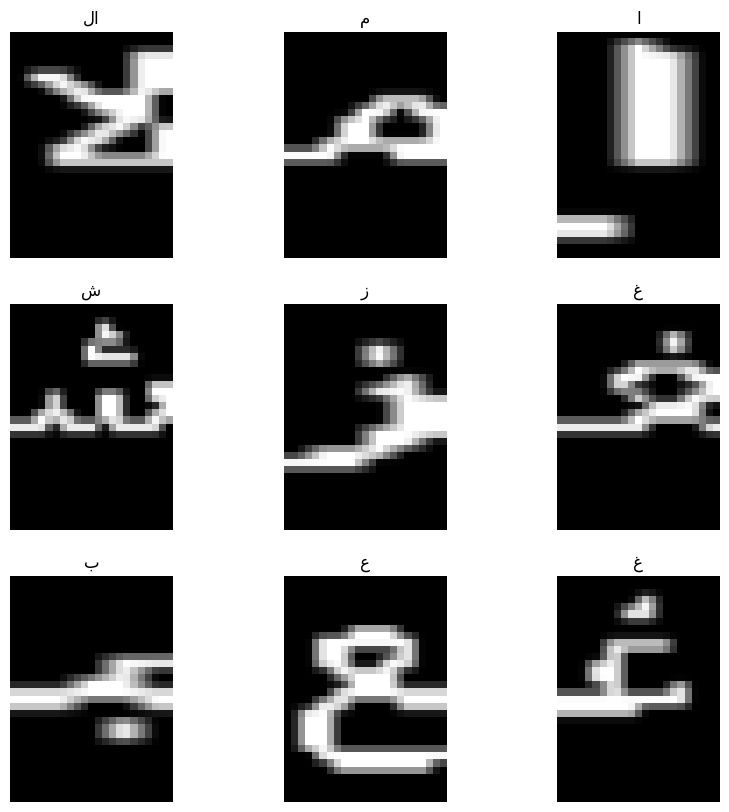

In [ ]:
dataset = image_dataset_from_directory('new_dataset',
                                             shuffle=True,
                                             batch_size=32,image_size=(32,23))
class_name =  dataset.class_names
plt.figure(figsize = (10,10))
for image , label in dataset.take(1):
    for i in range(9) :
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype("uint8"))
        plt.title(class_name[label[i]])
        plt.axis("off")

# Creat a CNN model

In [ ]:
# Set random seed for reproducibility
tf.random.set_seed(45)
np.random.seed(45)

# Define the model architecture
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(29, activation='softmax')  # 29 output classes for the 29 Arabic letters
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Display the model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [ ]:
# Train the model
model.fit(train_generator, epochs=10, validation_data=( val_generator))


Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/preprocessing/image.py:1862: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/keras/src/preprocessing/image.py:1872: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(
I0000 00:00:1709063995.821703     129 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1575/1575 [==============================] - 89s 54ms/step - loss: 0.9357 - accuracy: 0.7162 - val_loss: 0.4379 - val_accuracy: 0.8624
Epoch 2/10
1575/1575 [==============================] - 84s 53ms/step - loss: 0.2955 - accuracy: 0.9055 - val_loss: 0.2805 - val_accuracy: 0.9110
Epoch 3/10
1575/1575 [==============================] - 84s 53ms/step - loss: 0.2092 - accuracy: 0.9335 - val_loss: 0.1910 - val_accuracy: 0.9415
Epoch 4/10
1575/1575 [==============================] - 84s 53ms/step - loss: 0.1644 - accuracy: 0.9474 - val_loss: 0.1967 - val_accuracy: 0.9406
Epoch 5/10
1575/1575 [==============================] - 85s 54ms/step - loss: 0.1365 - accuracy: 0.9569 - val_loss: 0.1479 - val_accuracy: 0.9539
Epoch 6/10
1575/1575 [==============================] - 86s 55ms/step - loss: 0.1170 - accuracy: 0.9633 - val_loss: 0.1488 - val_accuracy: 0.9531
Epoch 7/10
1575/1575 [==============================] - 86s 54ms/step - loss: 0.1051 - accuracy: 0.9661 - val_loss: 0.1174 - val_accura

<Axes: >

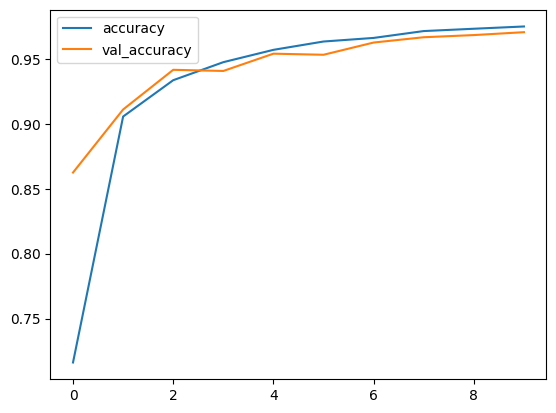

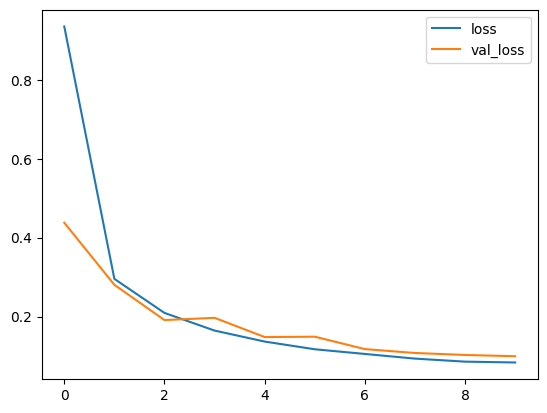

In [ ]:
#plot the accurcy
losses = pd.DataFrame(model.history.history)
losses[['accuracy','val_accuracy']].plot()
losses[['loss','val_loss']].plot()

In [ ]:
# Save the model in HDF5 format
model.save("Arabic_letters_model.h5")

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Save the model in HDF5 format
model.save("/kaggle/working/Arabic_letters_model.h5")

# pickel and doweload the model

In [ ]:
# Define the filename for saving the model
filename = '/kaggle/working/Arabic_letters_model_2.sav'

# Save the model using pickle.dump
pickle.dump(model, open(filename, 'wb'))
